# **Data Visualization 2 - Charting with Python - Lecture 2 - Intro to Dash**
---

## Importing the packages

In [10]:
from dash import Dash 
from dash import html, dcc 
from dash import callback, Output, Input
import plotly.express as px
# by not using pandas, you can guess we are not using external datasets

## Creating our first Dash app

### The chart which we will place on the app

In [11]:
df = px.data.gapminder().query("country == 'United States'")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.44,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.49,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.21,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.76,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.34,209896000,21806.03594,USA,840


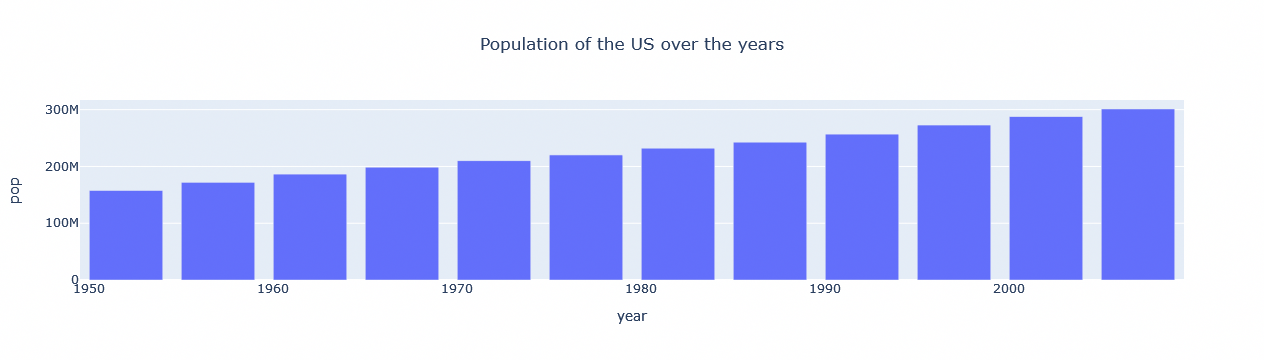

In [12]:
bar = px.bar(df, x = 'year', y = 'pop', 
              title = 'Population of the US over the years')

bar.update_layout(title_x = 0.5)

bar.show()

## Adding an input component to the app 

Let's add a textbox input to our app using dcc.Input()

Documentation: https://dash.plotly.com/dash-core-components/input

In [13]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    # adding the text input nested in a Div
    html.Div(dcc.Input(id='input1', type='text', placeholder = 'Type something here')),
    dcc.Graph(id = 'graph', figure = bar)
])

app.run(debug = True)

### Callbacks for text inputs

In [14]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Div(dcc.Input(id='input1', type='text', placeholder = 'Type something here')),
    # adding a general Div called output1 which will hold the output
    html.Div(id='output1'),
    dcc.Graph(id = 'graph', figure = bar)
])

# the app.callback decorator has 3 main components
# The Output part defines WHAT component will be changed when it runs
# The Input part defines WHEN it will be run

@app.callback(
    Output(component_id='output1', component_property='children'),
    Input(component_id='input1', component_property='value')
)
# the def part defines HOW the output will be changed.
# It will receive the value of the input as a parameter
# The 'update1' variable name can be anything, does not have to be same as the component name
# wrapping it in str() is useful when there's no input, so we will see None
# Output changes after every keystroke
def update1(_input1):
     return 'Output: ' + str(_input1)

app.run(debug = True)

We can simplify the callback definition by omitting the parameter names

In [15]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Div(dcc.Input(id='input1', type='text', placeholder = 'Type something here')),
    html.Div(id='output1'),
    dcc.Graph(id = 'graph', figure = bar)
])

# omitting the component_id and component_property named parameters
@app.callback(
    Output('output1','children'),
    Input('input1','value')
)

def update1(_input1):
     return 'Output: ' + str(_input1)

app.run(debug = True)

### Utilizing the Input component to set the chart title

In [16]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    dcc.Graph(id = 'graph', figure = bar)
])

@app.callback(
    Output('graph', 'figure'),
    Input('input1','value')
)

def update1(_input1):
    bar.update_layout(title = _input1)
    return bar

app.run(debug = True)

### Changing the color scheme of the chart

In [17]:
# creating a variable to hold the names of all of the available colorscales
colorscales = px.colors.named_colorscales()

# sorting by alphabetical order
colorscales.sort()

colorscales

['aggrnyl',
 'agsunset',
 'algae',
 'amp',
 'armyrose',
 'balance',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brbg',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'curl',
 'darkmint',
 'deep',
 'delta',
 'dense',
 'earth',
 'edge',
 'electric',
 'emrld',
 'fall',
 'geyser',
 'gnbu',
 'gray',
 'greens',
 'greys',
 'haline',
 'hot',
 'hsv',
 'ice',
 'icefire',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'matter',
 'mint',
 'mrybm',
 'mygbm',
 'oranges',
 'orrd',
 'oryel',
 'oxy',
 'peach',
 'phase',
 'picnic',
 'pinkyl',
 'piyg',
 'plasma',
 'plotly3',
 'portland',
 'prgn',
 'pubu',
 'pubugn',
 'puor',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdgy',
 'rdpu',
 'rdylbu',
 'rdylgn',
 'redor',
 'reds',
 'solar',
 'spectral',
 'speed',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'tealrose',
 'tempo',
 'temps',
 'thermal',
 'tropic',
 'turbid',
 'turbo',
 'twilight',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd']

In [18]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    # adding radiobuttons and giving it the mint string as placeholder
    # inline = True means they are displayed horizontally
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.RadioItems( id= 'input2', options=colorscales, value='mint', inline=True),
    dcc.Graph(id = 'graph', figure = bar)
])

@app.callback(
    Output('graph', 'figure'),
    Input('input1','value'),
    Input('input2','value')
)

def update1(_input1, _input2):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    return bar

app.run(debug = True)

### Using a dropdown instead of the radiobuttons

In [19]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    # replacing RadioItems with Dropdown
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    dcc.Graph(id = 'graph', figure = bar)
])

@app.callback(
    Output('graph', 'figure'),
    Input('input1','value'),
    Input('input2','value')
)

def update1(_input1, _input2):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    return bar

app.run(debug = True)

## Adding a second chart to the app

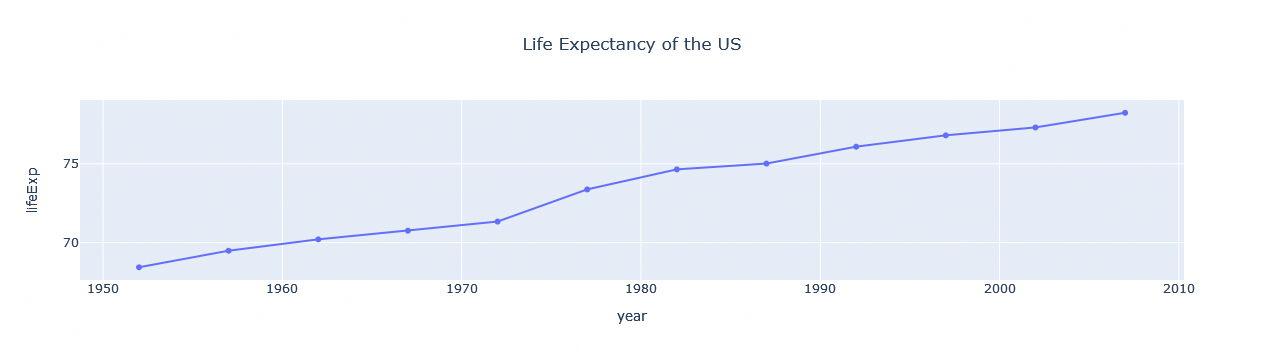

In [20]:
line = px.line(df, x = 'year', y = 'lifeExp', title = 'Life Expectancy of the US', markers = True)
line.update_layout(title_x = 0.5)
line.show()

In [21]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the bar chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    dcc.Graph(id = 'graph', figure = bar),
    dcc.Graph(id = 'graph2', figure = line)
])

@app.callback(
    Output('graph', 'figure'),
    Input('input1','value'),
    Input('input2','value')
)

def update1(_input1, _input2):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    return bar

app.run(debug = True)

### Side-by-side layout

In [22]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the bar chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    dcc.Graph(id = 'graph', figure = bar, style = {'display': 'inline-block', 'width': '49%'}),
    dcc.Graph(id = 'graph2', figure = line, style = {'display': 'inline-block', 'width': '49%'}),
])

@app.callback(
    Output('graph', 'figure'),
    Input('input1','value'),
    Input('input2','value')
)

def update1(_input1, _input2):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    return bar

app.run(debug = True)

## Adding a dropdown as a filter for the line chart

In [23]:
df_gap = px.data.gapminder()
countries = df_gap.country.unique()
countries.sort()

countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [24]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the bar chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    html.Label('Select country for the line chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input3', options=countries, value='United States', style={'width':'45%'}),
    dcc.Graph(id = 'graph', figure = bar, style = {'display': 'inline-block', 'width': '49%'}),
    dcc.Graph(id = 'graph2', figure = line, style = {'display': 'inline-block', 'width': '49%'}),
])

@app.callback(
    Output('graph', 'figure'),
    Output('graph2', 'figure'),
    Input('input1','value'),
    Input('input2','value'),
    Input('input3','value'),
)

def update1(_input1, _input2, _input3):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    
    line = px.line(px.data.gapminder().query('country == @_input3'), x = 'year', y = 'lifeExp', title = 'Life Expectancy of ' + str(_input3), markers = True)
    line.update_layout(title_x = 0.5)
    
    return bar, line

app.run(debug = True)

### Multi select dropdown

Let's use utilize the multi select dropdown to add more lines to the line chart.

In [25]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the bar chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    html.Label('Select country for the line chart:', style={'font-weight': 'bold', "text-align": "center"}),
    # adding the multi property
    dcc.Dropdown(id= 'input3', options=countries, value='United States', multi = True, style={'width':'45%'}),
    dcc.Graph(id = 'graph', figure = bar, style = {'display': 'inline-block', 'width': '49%'}),
    dcc.Graph(id = 'graph2', figure = line, style = {'display': 'inline-block', 'width': '49%'}),
])

@app.callback(
    Output('graph', 'figure'),
    Output('graph2', 'figure'),
    Input('input1','value'),
    Input('input2','value'),
    Input('input3','value'),
)

def update1(_input1, _input2, _input3):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    
    line = px.line(px.data.gapminder().query('country in @_input3'), x = 'year', y = 'lifeExp', 
                   title = 'Life Expectancy of ' + str(_input3), markers = True, color = 'country')
    line.update_layout(title_x = 0.5)
    
    return bar, line

app.run(debug = True)

#### Sorting out the title issue

In [26]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Set the title of the bar chart:', style={'font-weight': 'bold', "text-align": "center"}),
    html.Div(dcc.Input(id = 'input1', type='text', placeholder = 'Type something here')),
    html.Label('Set the color scale of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id= 'input2', options=colorscales, value='mint', style={'width':'35%'}),
    html.Label('Select country for the line chart:', style={'font-weight': 'bold', "text-align": "center"}),
    # adding the multi property
    dcc.Dropdown(id= 'input3', options=countries, value='United States', multi = True, style={'width':'45%'}),
    dcc.Graph(id = 'graph', figure = bar, style = {'display': 'inline-block', 'width': '49%'}),
    dcc.Graph(id = 'graph2', figure = line, style = {'display': 'inline-block', 'width': '49%'}),
])

@app.callback(
    Output('graph', 'figure'),
    Output('graph2', 'figure'),
    Input('input1','value'),
    Input('input2','value'),
    Input('input3','value'),
)

def update1(_input1, _input2, _input3):
    bar = px.bar(df, x = 'year', y = 'pop', color = 'lifeExp',
                 title = _input1, color_continuous_scale= str(_input2))
    
    line = px.line(px.data.gapminder().query('country in @_input3'), x = 'year', y = 'lifeExp', 
                   title = 'Life Expectancy of ' + str(_input3).replace('[','').replace(']','').replace("'",""), markers = True, color = 'country')
    line.update_layout(title_x = 0.5)
    
    return bar, line

app.run(debug = True)

In [30]:
themes = [
    {'label': 'Plotly', 'value': 'plotly'},
    {'label': 'Seaborn', 'value': 'seaborn'},
    {'label': 'Simple White', 'value': 'simple_white'},
    # Add more themes as required
]

In [31]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='This is our first Dash app', style={'textAlign':'center'}),
    # adding a label to inform the user of the app what the dropdown is for
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    # giving an id to the Graph component so that we can refer it in the callback
    dcc.Graph(id = 'graph')
])

@app.callback(
    Output('graph', 'figure'), 
    Input('dropdown', 'value'))

# chart definition moves to the update method if we want to influence it with input components
def change_template(template_name):
    df = px.data.gapminder().query("country == 'United States'")
    # we can use the attribute of the method to influence the template
    fig = px.line(df, x = 'year', y = 'lifeExp', title = 'Life expectancy of the US over the years', template = template_name)
    fig.update_layout(title_x = 0.5)
    return fig

if __name__ == '__main__':
    app.run(debug=True)

In [32]:
app = Dash(__name__)

df = px.data.gapminder()

# creating a variable for the list of countries
countries = df.country.unique()

app.layout = html.Div([
    html.H1(children='This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    # adding the label and the dropdown
    html.Label('Select the countries to compare:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown2', options = countries, value = 'United States', multi = True),
    dcc.Graph(id = 'graph')
])

# a second input comes to the callback
@app.callback(
    Output('graph', 'figure'), 
    Input('dropdown', 'value'),
    Input('dropdown2', 'value'))

def update_chart(template_name, country_list):
    # we can reference our variables using @
    df = px.data.gapminder().query("country in @country_list")
    fig = px.line(df, x = 'year', y = 'lifeExp', title = 'Life expectancy of ' + str(country_list).replace('[','').replace(']','').replace("'",""), color = 'country', markers = True, template = template_name)
    fig.update_layout(title_x = 0.5)
    return fig

if __name__ == '__main__':
    app.run(debug=True)

In [33]:
app = Dash(__name__)

df = px.data.gapminder()

# creating a variable for the list of countries
countries = df.country.unique()

app.layout = html.Div([
    html.H1(children='This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    html.Label('Select the countries to compare:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown2', options = countries, value = 'United States', multi = True),
    # adding the label and the slider for changing the width
    html.Label('Select the width of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Slider(700, 900, 100, value = 800, id = 'slider'),
    html.Div(dcc.Graph(id = 'graph'), style = {'display': 'inline-block', 'width': '50%'})
])

# a second input comes to the callback
@app.callback(
    Output('graph', 'figure'), 
    Input('dropdown', 'value'),
    Input('dropdown2', 'value'),
    Input('slider', 'value'))

def update_chart(template_name, country_list, width_):
    # we can reference our variables using @
    df = px.data.gapminder().query("country in @country_list")
    fig = px.line(df, x = 'year', y = 'lifeExp', title = 'Life expectancy of ' + str(country_list).replace('[','').replace(']','').replace("'",""), 
                  color = 'country', markers = True, template = template_name, width = width_)
    fig.update_layout(title_x = 0.5)
    return fig

if __name__ == '__main__':
    app.run(debug=True)

In [34]:
app = Dash(__name__)

df = px.data.gapminder()

# creating a variable for the list of countries
countries = df.country.unique()

app.layout = html.Div([
    html.H1(children='This is our first Dash app', style={'textAlign':'center'}),
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    html.Label('Select the countries to compare:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown2', options = countries, value = 'United States', multi = True),
    # adding the label and the slider for changing the width
    html.Label('Select the width of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Slider(700, 900, 100, value = 800, id = 'slider'),
    html.Div(dcc.Graph(id = 'graph'), style = {'display': 'inline-block', 'width': '50%'}),
    # adding another div for the second chart
    html.Div(dcc.Graph(id = 'graph2'), style = {'display': 'inline-block', 'width': '50%'})
])

# a second input comes to the callback
@app.callback(
    Output('graph', 'figure'), 
    # extending the callback with the second chart
    Output('graph2', 'figure'),
    Input('dropdown', 'value'),
    Input('dropdown2', 'value'),
    Input('slider', 'value'))

def update_chart(template_name, country_list, width_):
    # we can reference our variables using @
    df = px.data.gapminder().query("country in @country_list")
    fig = px.line(df, x = 'year', y = 'lifeExp', title = 'Life expectancy of ' + str(country_list).replace('[','').replace(']','').replace("'",""), 
                  color = 'country', markers = True, template = template_name, width = width_)
    fig.update_layout(title_x = 0.5, title_font_size = 15)
    
    fig2 = px.line(df, x = 'year', y = 'gdpPercap', color = 'country', title = 'GDP per capita of ' + str(country_list).replace('[','').replace(']','').replace("'",""),
                  facet_col = 'country', facet_col_wrap = 3, template = template_name, width = width_)
    fig2.update_layout(title_x = 0.5, title_font_size = 15)
    # returning 2 charts this time
    return fig, fig2 

if __name__ == '__main__':
    app.run(debug=True)